## Epsilon greedy + optimistic value(epsilon =0 ) + UCB

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import actionMethods as am

R = np.load('bandits10_500.npz')['arr_0']
print(R[0,1])

8.0


In [12]:
# Choose epsilon; # exploration probability
# Choose n; # number of iterations
# for i = 1 to n do:
#   prob = pick a random number from 0 to 1
#   if p < epsilon:
#        current_bandit = pick bandit at random  # explore
#   else:
#        current_bandit = pick best bandit so far  # exploit
#   reward = current_bandit.pull_arm()
#
#   Update estimation for what rewards the current bandit gives

In [13]:
def epsilon_greedy1(eps, Q, N, k,R):
    
    for i in range(20) :
        
        prob = np.random.rand()
        
        if prob < (1 - eps) :
            index = np.argmax(Q)
            A = R[i,index]
            N[index]+=1
            Q[index]+=(1/N[index])*(A-Q[index])
            print(Q)
        else :
            index = np.random.randint(4)
            A = R[i][index]
            N[index]+=1
            Q[index]+=(1/N[index])*(A-Q[index])
        
    return Q, N


In [21]:
def action_method(eps, Q, N,R, k_times, n_arms ,action):
    
    
    if(action == "optimistic" or action == "epsilon_greedy" ):
        if(action == "optimistic"):
            eps = 0
        
        for i in range(k_times):

            prob = np.random.rand()

            if prob < (1 - eps):
                a = np.argmax(Q)
                N[a]+=1
                Q[a]+=(1/N[a])*(R[i,a]-Q[a])
            else:

                a = np.random.randint(n_arms)
                N[a]+=1
                Q[a]+=(1/N[a])*(R[i,a]-Q[a])
                
    else:
        for i in range(k_times) :
            a = np.argmax(Q +C*np.sqrt(np.log(k_times)/N))
            A = R[i,a]
            N[a]+=1
            Q[a]+= 1/N[a]*(A-Q[a])
        
        
    return Q, N

## Epsilon-greedy

In [22]:
k_times = 500
n_arms = 10
eps = 0.5
Q = np.zeros(n_arms)
N = np.zeros(n_arms)

action = "epsilon_greedy"

Q, N = am.action_method(eps, Q, N, R, k_times, n_arms, action)
print(Q)
print(N)

[ 9.48275862  9.9         5.91666667  7.03846154 10.55882353  6.81818182
 11.33333333 11.68995633  7.94736842  9.6       ]
[ 29.  30.  24.  26.  34.  22.  57. 229.  19.  30.]


## Optimistic Initial Values

In [16]:
k_times = 20
n_arms = 4
eps = 0

Q = np.array([1,3,6,9])
N = np.zeros(4)
action = "optimistic"

Q, N = action_method(eps, Q, N, R, k_times, n_arms, action)
print(Q)
print(N)

[1 3 4 4]
[ 0.  0.  6. 14.]


## UCB

In [19]:
k_times = 20
n_arms = 4
Q = np.zeros(n_arms)
N = np.zeros(n_arms)
C = 2
eps = 0
action = "UCB"

Q, N = action_method(eps, Q, N, R, k_times, n_arms, action)
print(Q)
print(N)

[ 6.         10.05882353  7.          7.        ]
[ 1. 17.  1.  1.]


<ipython-input-14-fff70cf1dcdf>:24: RuntimeWarning: divide by zero encountered in true_divide
  a = np.argmax(Q +C*np.sqrt(np.log(k_times)/N))


In [29]:
# interrogateBandit

Text(0, 0.5, 'Reward Distribution')

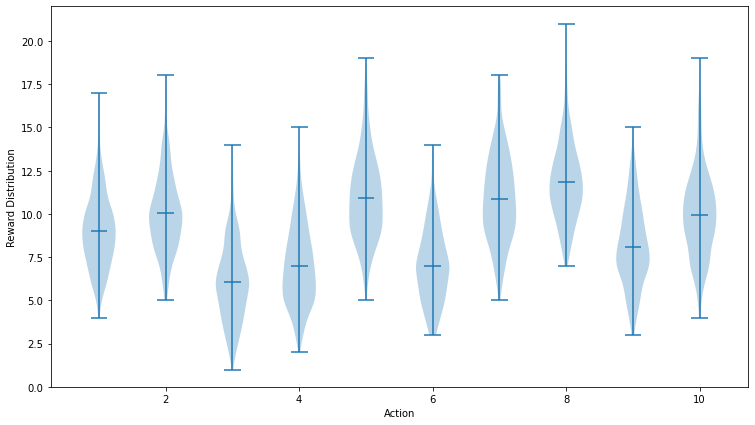

In [7]:
plt.figure(figsize=(12.5, 7))
plt.violinplot(dataset=R, showmeans=True)
plt.xlabel("Action")
plt.ylabel("Reward Distribution")